# Topics in Artificial Intelligence (CPSC 532L)
# Assignment 1: Intriduction to Deep Learning


This assignment is inspired and adopted from the Deep Learning Lab from Vicente Ordonez's course on Language and Vision at the University of Virginia. The link to the original lab is <a href="http://www.cs.virginia.edu/~vicente/vislang/notebooks/deep_learning_lab.html">here</a>. The first two parts of this notebook are taken nearly verbatim from his lab. Section 1 is provided for you and implements a single-layer supervised neural network; no coding is required for Section 1. Section 2 and Section 3 are the ones where you need to code the solutions and provide answers to questions.

# 1. Single-layer neural network
This section provides simple implementation of the single-layer supervised neural network that has 4 inputs and 3 outputs. First, let's review the skeleton of a single linear layer neural network. The inputs of the network are the variables $x_1, x_2, x_3, x_4$, or the input vector $\mathbf{x}=[x_1, x_2, x_3, x_4]$, the outputs of the network are $\widehat{y}_1,\widehat{y}_2,\widehat{y}_3$, or the output vector $\widehat{\mathbf{y}}=[$$\widehat{y}$$_1,\widehat{y}_2,\widehat{y}_3]$:

<img src="1_layer_net.png" width="450"/>

The given $j$-th output $\widehat{y}_j$ of this single linear layer + activation function is computed as follows:

$$\widehat{y}_j= \text{sigmoid}(w_{1j}x_1 + w_{2j}x_2 + w_{3j}x_3 + w_{4j}x_4 + b_j) = \text{sigmoid}\Big(\sum_{i=1}^{i=4}w_{ij}x_{i} + b_j\Big)$$

In matrix notation, this would be: 

\begin{equation}
\begin{bmatrix}
  \widehat{y}_{1} \\ 
  \widehat{y}_{2} \\
  \widehat{y}_{3} 
\end{bmatrix}^T=\mathbf{Sigmoid}\Bigg(
\begin{bmatrix}
  x_{1} \\
  x_{2} \\
  x_{3} \\
  x_{4}
\end{bmatrix}^T
\begin{bmatrix}
  w_{1,1} & w_{1,2} & w_{1,3}\\
  w_{2,1} & w_{3,2} & w_{2,3}\\
  w_{3,1} & w_{3,2} & w_{3,3}\\
  w_{4,1} & w_{4,2} & w_{4,3}
\end{bmatrix}
+
\begin{bmatrix}
  b_{1} \\
  b_{2} \\
  b_{3}
\end{bmatrix}^T\Bigg)
\end{equation}

or more compactly:

\begin{equation}
\widehat{\mathbf{y}}^T = \mathbf{Sigmoid}(\mathbf{x}^T \cdot \mathbf{W} + \mathbf{b}^T)
\end{equation}

The element-wise sigmoid function is: $\mathbf{Sigmoid}(\mathbf{x}) = 1 \;/\; (1 + exp(-\mathbf{x}))$, or alternatively: $\mathbf{Sigmoid}(\mathbf{x}) = exp(\mathbf{x})\;/\;(1 + exp(\mathbf{x}))$. Here the sigmoid is separated logically into an activation layer $\sigma(x)$ and a linear layer $\text{linear}(3,4)$ as illustrated in figure. 

Training these weights $\mathbf{W}$ and biases $\mathbf{b}$ requires having many training pairs $(\widehat{\mathbf{y}}^{(m)}, \mathbf{x}^{(m)})$. The inputs $\mathbf{x}$ can be the pixels of an image, indices of words, the entries in a database, and the outputs $\widehat{\mathbf{y}}$ can also be literally anything, including a number indicating a category, a set of numbers indicating the indices of words composing a sentence, an output image itself, etc.

## 1.1. Forward-propagation

Computing the outputs $\widehat{\mathbf{y}}$ from the inputs $\mathbf{x}$ in this network composed of a single linear layer, and a sigmoid layer, is called forward-propagation. Below is the code that implements these two operations:

In [90]:
import numpy as np
import numpy.matlib

class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.001
        self.bias = np.matlib.randn((1, output_dim)) * 0.001
        
    # y = Wx + b
    def forward(self, x):
        return np.dot(x, self.weight) + self.bias
    
    def getParameters(self):
        return [self.weight, self.bias]

# Let's test the composition of the two functions (forward-propagation in the neural network).
x1 = np.array([[1, 2, 2, 3]])
y_hat1 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x1))
print('x[1] = '+ str(x1))
print('y_hat[1] = ' + str(y_hat1) + '\n')

# Let's test the composition of the two functions (forward-propagation in the neural network).
x2 = np.array([[4, 5, 2, 1]])
y_hat2 = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x2))
print('x[2] = '+ str(x2))
print('y_hat[2] = ' + str(y_hat2) + '\n')

# We can also compute both at once, which could be more efficient since it requires a single matrix multiplication.
x = np.concatenate((x1, x2), axis = 0)
y_hat = nn_Sigmoid().forward(nn_Linear(4, 3).forward(x))
print('x = ' + str(x))
print('y_hat = ' + str(y_hat))

x[1] = [[1 2 2 3]]
y_hat[1] = [[ 0.50147293  0.50182333  0.49880534]]

x[2] = [[4 5 2 1]]
y_hat[2] = [[ 0.50116392  0.4993234   0.49838757]]

x = [[1 2 2 3]
 [4 5 2 1]]
y_hat = [[ 0.49914531  0.50111424  0.50004347]
 [ 0.49771992  0.49872357  0.5008705 ]]


## 1.2. Loss functions.

After computing the output predictions $\widehat{\mathbf{y}}$ it is necessary to compare these against the true values of $\mathbf{y}$. Let's call these true, correct, or desired values $\mathbf{y}$. Typically, a simple loss or cost function is used to measure the degree by which the prediction $\widehat{\mathbf{y}}$ is wrong with respect to $\mathbf{y}$. A common loss function for regression is the sum of squared differences between the prediction and its true value. Assuming a prediction $\widehat{\mathbf{y}}^{(d)}$ for our training sample $\mathbf{x}^{(d)}$ with true value $\mathbf{y}^{(d)}$, then the loss can be computed as:

$$loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)}) = (\widehat{y}^{(d)}_1 - y^{(d)}_1)^2 + (\widehat{y}^{(d)}_2 - y^{(d)}_2)^2 + (\widehat{y}^{(d)}_3 - y^{(d)}_3)^2 = \sum_{j=1}^{j=3}(\widehat{y}^{(d)}_j - y^{(d)}_j)^2$$

The goal is to modify the parameters [$\mathbf{W}, \mathbf{b}$] in the Linear layer so that the value of $loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$ becomes as small as possible for all training samples in a set $D=\{(\mathbf{x}^{(d)},\mathbf{y}^{(d)})\}$. This would in turn ensure that predictions $\widehat{\mathbf{y}}$ are as similar as possible to the true values $\mathbf{y}$. To achieve this we need to minimize the following function:

$$\mathcal{L}(\mathbf{W}, \mathbf{b}) = \sum_{d=1}^{d=|D|} loss(\widehat{\mathbf{y}}^{(d)}, \mathbf{y}^{(d)})$$

The only two variables for our model in the function $\mathcal{L}(\mathbf{W}, \mathbf{b})$ are $\mathbf{W}$ and $\mathbf{b}$, this is because the training dataset $D$ is fixed. Finding the values of $\mathbf{W}$ and $\mathbf{b}$ that minimize the the loss, particularly for complex functions, is typically done using gradient based optimization, like Stochastic Gradient Descent (SGD). 

In [4]:
class nn_MSECriterion:  # MSE = mean squared error.
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))

# Let's test the loss function.
y_hat = np.array([[0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33], [0.23, 0.25, 0.33]])
y_true = np.array([[0.25, 0.25, 0.25], [0.33, 0.33, 0.33], [0.77, 0.77, 0.77], [0.80, 0.80, 0.80]])

nn_MSECriterion().forward(y_hat, y_true)

1.6271000000000002


## 1.3. Backward-propagation (Backpropagation)

As we discussed in class, backpropagation is just applying the chain-rule in calculus to compute the derivative of a function which is the composition of many functions (this is essentially definition of the neural network). 

Below is the implementation of required derivative computations for our simple network. You are highly advised to derive the derivatives implemented here to make sure you understand how one arrives at them. 

In [91]:
# This is referred above as f(u).
class nn_MSECriterion:
    def forward(self, predictions, labels):
        return np.sum(np.square(predictions - labels))
        
    def backward(self, predictions, labels):
        num_samples = labels.shape[0]
        return num_samples * 2 * (predictions - labels)

# This is referred above as g(v).
class nn_Sigmoid:
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    
    def backward(self, x, gradOutput):
        # It is usually a good idea to use gv from the forward pass and not recompute it again here.
        gv = 1 / (1 + np.exp(-x))  
        return np.multiply(np.multiply(gv, (1 - gv)), gradOutput)

# This is referred above as h(W, b)
class nn_Linear:
    def __init__(self, input_dim, output_dim):
        # Initialized with random numbers from a gaussian N(0, 0.001)
        self.weight = np.matlib.randn(input_dim, output_dim) * 0.01
        self.bias = np.matlib.randn((1, output_dim)) * 0.01
        self.gradWeight = np.zeros_like(self.weight)
        self.gradBias = np.zeros_like(self.bias)
        
    def forward(self, x):
        return np.dot(x, self.weight) + self.bias
    
    def backward(self, x, gradOutput):
        # dL/dw = dh/dw * dL/dv
        self.gradWeight = np.dot(x.T, gradOutput)
        # dL/db = dh/db * dL/dv
        self.gradBias = np.copy(gradOutput)
        # return dL/dx = dh/dx * dL/dv
        return np.dot(gradOutput, self.weight.T)
    
    def getParameters(self):
        params = [self.weight, self.bias]
        gradParams = [self.gradWeight, self.gradBias]
        return params, gradParams
    

# Let's test some dummy inputs for a full pass of forward and backward propagation.
x1 = np.array([[1, 2, 2, 3]])
y1 = np.array([[0.25, 0.25, 0.25]])

# Define the operations.
linear = nn_Linear(4, 3)  # h(W, b)
sigmoid = nn_Sigmoid()  # g(v)
loss = nn_MSECriterion()  # f(u)

# Forward-propagation.
lin = linear.forward(x1)
y_hat = sigmoid.forward(lin)
loss_val = loss.forward(y_hat, y1) # Loss function.

# Backward-propagation.
dy_hat = loss.backward(y_hat, y1)
dlin = sigmoid.backward(lin, dy_hat)
dx1 = linear.backward(x1, dlin)

# Show parameters of the linear layer.
print('\nW = ' + str(linear.weight))
print('B = ' + str(linear.bias))

# Show the intermediate outputs in the forward pass.
print('\nx1    = '+ str(x1))
print('lin   = ' + str(lin))
print('y_hat = ' + str(y_hat))

print('\nloss = ' + str(loss_val))

# Show the intermediate gradients with respect to inputs in the backward pass.
print('\ndy_hat = ' + str(dy_hat))
print('dlin   = ' + str(dlin))
print('dx1    = ' + str(dx1))

# Show the gradients with respect to parameters.
print('\ndW = ' + str(linear.gradWeight))
print('dB = ' + str(linear.gradBias))


W = [[ 0.01069966 -0.01045534  0.00355285]
 [ 0.00755392  0.00700982 -0.00198937]
 [ 0.0030196  -0.0039469  -0.01171813]
 [ 0.00984012 -0.00559681  0.01379758]]
B = [[ 0.00602451 -0.00892647 -0.00161198]]

x1    = [[1 2 2 3]]
lin   = [[ 0.06739157 -0.0300464   0.01591859]]
y_hat = [[ 0.51684152  0.49248896  0.50397956]]

loss = 0.194510913256

dy_hat = [[ 0.53368304  0.48497793  0.50795913]]
dlin   = [[ 0.13326939  0.12121712  0.12698174]]
dx1    = [[ 0.00060972  0.0016038  -0.001564    0.002385  ]]

dW = [[ 0.13326939  0.12121712  0.12698174]
 [ 0.26653878  0.24243424  0.25396347]
 [ 0.26653878  0.24243424  0.25396347]
 [ 0.39980816  0.36365137  0.38094521]]
dB = [[ 0.13326939  0.12121712  0.12698174]]


## 1.4. Gradient checking 

The gradients can also be computed with numerical approximation using the definition of derivatives. Let a single input pair $(\mathbf{x}, \mathbf{y})$ be the input, for each entry $w_{ij}$ in the weight matrix $\mathbf{W}$, the partial derivatives can be computed as follows:

$$\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}} = \frac{\mathcal{L}(\mathbf{W} + \mathbf{E}_{ij},b) - \mathcal{L}(\mathbf{W} - \mathbf{E}_{ij}, b)}{2\epsilon}, $$

where $\mathbf{E}_{ij}$ is a matrix that has $\epsilon$ in its $(i,j)$ entry and zeros everywhere else. Intuitively this gradient tells how would the value of the loss changes if we change a particular weight $w_{ij}$ by an $\epsilon$ amount. We can do the same to compute derivatives with respect to the bias parameters $b_i$. Below is the code that checks for a given input $(\mathbf{x}, \mathbf{y})$, the gradients for the matrix $\mathbf{W}$. 

In [94]:
# We will compute derivatives with respect to a single data pair (x,y)
x = np.array([[2.34, 3.8, 34.44, 5.33]])
y = np.array([[3.2, 4.2, 5.3]])

# Define the operations.
linear = nn_Linear(4, 3)
sigmoid = nn_Sigmoid()
criterion = nn_MSECriterion()

# Forward-propagation.
a0 = linear.forward(x)
a1 = sigmoid.forward(a0)
loss = criterion.forward(a1, y) # Loss function.

# Backward-propagation.
da1 = criterion.backward(a1, y)
da0 = sigmoid.backward(a0, da1)
dx = linear.backward(x, da0)

gradWeight = linear.gradWeight
gradBias = linear.gradBias

approxGradWeight = np.zeros_like(linear.weight)
approxGradBias = np.zeros_like(linear.bias)

# We will verify here that gradWeights are correct and leave it as an excercise
# to verify the gradBias.
epsilon = 0.0001
for i in range(0, linear.weight.shape[0]):
    for j in range(0, linear.weight.shape[1]):
        # Compute f(w)
        fw = criterion.forward(sigmoid.forward(linear.forward(x)), y) # Loss function.
        # Compute f(w + eps)
        shifted_weight = np.copy(linear.weight)
        shifted_weight[i, j] = shifted_weight[i, j] + epsilon
        shifted_linear = nn_Linear(4, 3)
        shifted_linear.bias = linear.bias
        shifted_linear.weight = shifted_weight
        fw_epsilon = criterion.forward(sigmoid.forward(shifted_linear.forward(x)), y) # Loss function
        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight[i, j] = (fw_epsilon - fw) / epsilon

# These two outputs should be similar up to some precision.
print('gradWeight: ' + str(gradWeight))
print('\napproxGradWeight: ' + str(approxGradWeight))



gradWeight: [[ -3.05968243  -4.31320662  -5.6230368 ]
 [ -4.96871505  -7.00435264  -9.13142728]
 [-45.03224905 -63.48155391 -82.75956725]
 [ -6.96927664  -9.8245262  -12.80802827]]

approxGradWeight: [[ -3.05961032  -4.31325241  -5.6230117 ]
 [ -4.96852486  -7.00447336  -9.13136104]
 [-45.01659096 -63.49141508 -82.75405304]
 [ -6.96890242  -9.82476364 -12.80789785]]


## 1.5. Stochastic Gradient Descent.

The code below creates a dummy dataset that will be used for training. The inputs are 1000 vectors of size 4, and the outputs are 1000 vectors of size 3. The focus here is on training, however, in a real task one would check accuracy of the model on test (unseen) data.

In [128]:
dataset_size = 1000

# Generate random inputs within some range.
x = np.random.uniform(0, 6, (dataset_size, 4))
# Generate outputs based on the inputs using some function.
y1 = np.sin(x.sum(axis = 1))
y2 = np.sin(x[:, 1] * 6)
y3 = np.sin(x[:, 1] + x[:, 3])
y = np.array([y1, y2, y3]).T

print(x.shape)
print(y.shape)

(1000, 4)
(1000, 3)


To learn the parameters efficiently we will implement the stochastic gradient descent loop that moves the weights according to the gradients. In each iteration we sample an $(\mathbf{x}, \mathbf{y})$ pair and compute the gradients of the parameters, then we update the parameters according to the following gradient descent rules:

$$w_{ij} = w_{ij} - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial w_{ij}}$$

$$b_i = b_i - \lambda\frac{\partial \mathcal{L}(\mathbf{W},\mathbf{b})}{\partial b_i}$$

where $\lambda$ is the learning rate. 

In [129]:
learningRate = 0.1

model = {}
model['linear'] = nn_Linear(4, 3)
model['sigmoid'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

for epoch in range(0, 400):
    loss = 0
    for i in range(0, dataset_size):
        xi = x[i:i+1, :]
        yi = y[i:i+1, :]

        # Forward.
        a0 = model['linear'].forward(xi)
        a1 = model['sigmoid'].forward(a0)
        loss += model['loss'].forward(a1, yi)

        # Backward.
        da1 = model['loss'].backward(a1, yi)
        da0 = model['sigmoid'].backward(a0, da1)
        model['linear'].backward(xi, da0)

        model['linear'].weight = model['linear'].weight - learningRate * model['linear'].gradWeight
        model['linear'].bias = model['linear'].bias - learningRate * model['linear'].gradBias
    
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

epoch[0] = 1.50174681
epoch[10] = 1.42726799
epoch[20] = 1.41476205
epoch[30] = 1.40955245
epoch[40] = 1.40674918
epoch[50] = 1.40505671
epoch[60] = 1.40396220
epoch[70] = 1.40321063
epoch[80] = 1.40266816
epoch[90] = 1.40226149
epoch[100] = 1.40194778
epoch[110] = 1.40170013
epoch[120] = 1.40150070
epoch[130] = 1.40133719
epoch[140] = 1.40120092
epoch[150] = 1.40108568
epoch[160] = 1.40098690
epoch[170] = 1.40090122
epoch[180] = 1.40082609
epoch[190] = 1.40075956
epoch[200] = 1.40070011
epoch[210] = 1.40064655
epoch[220] = 1.40059794
epoch[230] = 1.40055349
epoch[240] = 1.40051260
epoch[250] = 1.40047475
epoch[260] = 1.40043953
epoch[270] = 1.40040659
epoch[280] = 1.40037565
epoch[290] = 1.40034646
epoch[300] = 1.40031882
epoch[310] = 1.40029257
epoch[320] = 1.40026757
epoch[330] = 1.40024368
epoch[340] = 1.40022082
epoch[350] = 1.40019889
epoch[360] = 1.40017781
epoch[370] = 1.40015752
epoch[380] = 1.40013797
epoch[390] = 1.40011909


# 2. Two-layer neural network with 1-hidden layer.
Section 1 implemented a single layer neural network that takes as input vectors of size 4, and outputs vectors of size 3. Here your task is to modify the code to train a two layer network with one hidden layer of size hidden_state_size (note that this is a parameter and should be something you can change). You will need to handin your code for this and remaining parts of the notebook; the notebook you hand in should also have code executed and result saved.  

<img src="2_layer_net.png" width="650"/>

## 2.1. Implementing the network and SGD learning [20 points].
Please modify the code of Section 1.5 to implement a two-layer network and the SGD training procedure for it. 


In [130]:
hidden_state_size = 5;

learningRate = 0.1

model = {}
model['linear1'] = nn_Linear(4, hidden_state_size)
model['linear2'] = nn_Linear(hidden_state_size, 3)
model['sigmoid'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

for epoch in range(0, 400):
    loss = 0
    for i in range(0, dataset_size):
        xi = x[i:i+1, :]
        yi = y[i:i+1, :]

        # Forward.
        a0 = model['linear1'].forward(xi)
        a1 = model['sigmoid'].forward(a0)
        a00 = model['linear2'].forward(a1)
        a11 = model['sigmoid'].forward(a00)                         
        loss += model['loss'].forward(a11, yi)

        # Backward.
        da1 = model['loss'].backward(a11, yi)
        da0 = model['sigmoid'].backward(a00, da1)    
        da11 = model['linear2'].backward(a1, da0)
        da00 = model['sigmoid'].backward(a0, da11) 
        model['linear1'].backward(xi, da00)

        model['linear1'].weight = model['linear1'].weight - learningRate * model['linear1'].gradWeight
        model['linear2'].weight = model['linear2'].weight - learningRate * model['linear2'].gradWeight

        model['linear1'].bias = model['linear1'].bias - learningRate * model['linear1'].gradBias
        model['linear2'].bias = model['linear2'].bias - learningRate * model['linear2'].gradBias

  
    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))

epoch[0] = 1.53001198
epoch[10] = 1.49661734
epoch[20] = 1.46293881
epoch[30] = 1.44672599
epoch[40] = 1.42500981
epoch[50] = 1.41371630
epoch[60] = 1.40908508
epoch[70] = 1.40612423
epoch[80] = 1.40484401
epoch[90] = 1.40414736
epoch[100] = 1.40368883
epoch[110] = 1.40335006
epoch[120] = 1.40308145
epoch[130] = 1.40285915
epoch[140] = 1.40267074
epoch[150] = 1.40250889
epoch[160] = 1.40236808
epoch[170] = 1.40224305
epoch[180] = 1.40212819
epoch[190] = 1.40201615
epoch[200] = 1.40189136
epoch[210] = 1.40168849
epoch[220] = 1.40082770
epoch[230] = 1.39526648
epoch[240] = 1.37712140
epoch[250] = 1.33376579
epoch[260] = 1.30910527
epoch[270] = 1.30106595
epoch[280] = 1.29817381
epoch[290] = 1.29690887
epoch[300] = 1.29625792
epoch[310] = 1.29586788
epoch[320] = 1.29561076
epoch[330] = 1.29542900
epoch[340] = 1.29528199
epoch[350] = 1.29515827
epoch[360] = 1.29505568
epoch[370] = 1.29496529
epoch[380] = 1.29488044
epoch[390] = 1.29480054


In [ ]:
# 2.2. Gradient checking [10 points].

In [121]:
hidden_state_size = 5;

# We will compute derivatives with respect to a single data pair (x,y)
x = np.array([[2.34, 3.8, 34.44, 5.33]])
y = np.array([[3.2, 4.2, 5.3]])

# Define the operations.
model = {}
model['linear1'] = nn_Linear(4, hidden_state_size)
model['linear2'] = nn_Linear(hidden_state_size, 3)
model['sigmoid'] = nn_Sigmoid()
model['loss'] = nn_MSECriterion()

# Forward-propagation.
a0 = model['linear1'].forward(x)
a1 = model['sigmoid'].forward(a0)
a00 = model['linear2'].forward(a1)
a11 = model['sigmoid'].forward(a00)                         
loss = model['loss'].forward(a11, y)


# Backward-propagation.
da1 = model['loss'].backward(a11, y)
da0 = model['sigmoid'].backward(a00, da1)    
da11 = model['linear2'].backward(a1, da0)
da00 = model['sigmoid'].backward(a0, da11) 
dx = model['linear1'].backward(x, da00)
        
gradWeight1 = model['linear1'].gradWeight
gradBias1 = model['linear1'].gradBias

gradWeight2 = model['linear2'].gradWeight
gradBias2 = model['linear2'].gradBias

approxGradWeight1 = np.zeros_like(model['linear1'].weight)
approxGradBias1 = np.zeros_like(model['linear1'].bias)

approxGradWeight2 = np.zeros_like(model['linear2'].weight)
approxGradBias2 = np.zeros_like(model['linear2'].bias)


#verify with respect to W1
epsilon = 0.0001
for i in range(0, model['linear1'].weight.shape[0]):
    for j in range(0, model['linear1'].weight.shape[1]):
        # Compute f(w)
        fw = model['loss'].forward(model['sigmoid'].forward(model['linear2'].forward(model['sigmoid'].forward(model['linear1'].forward(x)))), y)
        # Compute f(w + eps)
        shifted_weight = np.copy(model['linear1'].weight)
        shifted_weight[i, j] = shifted_weight[i, j] + epsilon
        shifted_linear = nn_Linear(4, hidden_state_size)
        shifted_linear.bias = model['linear1'].bias
        shifted_linear.weight = shifted_weight
        fw_epsilon= model['loss'].forward(model['sigmoid'].forward(model['linear2'].forward(model['sigmoid'].forward(shifted_linear.forward(x)))), y)

        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight1[i, j] = (fw_epsilon - fw) / epsilon

# These two outputs should be similar up to some precision.
print('gradWeight1: ' + str(gradWeight1))
print('\napproxGradWeight1: ' + str(approxGradWeight1))



#verify with respect to W1
epsilon = 0.0001
for i in range(0, model['linear2'].weight.shape[0]):
    for j in range(0, model['linear2'].weight.shape[1]):
        # Compute f(w)
        fw = model['loss'].forward(model['sigmoid'].forward(model['linear2'].forward(model['sigmoid'].forward(model['linear1'].forward(x)))), y)
        # Compute f(w + eps)
        shifted_weight = np.copy(model['linear2'].weight)
        shifted_weight[i, j] = shifted_weight[i, j] + epsilon
        shifted_linear = nn_Linear(4, hidden_state_size)
        shifted_linear.bias = model['linear2'].bias
        shifted_linear.weight = shifted_weight
        fw_epsilon= model['loss'].forward(model['sigmoid'].forward(shifted_linear.forward(model['sigmoid'].forward(model['linear1'].forward(x)))), y)

        # Compute (f(w + eps) - f(w)) / eps
        approxGradWeight2[i, j] = (fw_epsilon - fw) / epsilon

# These two outputs should be similar up to some precision.
print('gradWeight2: ' + str(gradWeight2))
print('\napproxGradWeight2: ' + str(approxGradWeight2))

gradWeight1: [[-0.00506845 -0.03100955  0.00882999 -0.01763914 -0.00385701]
 [-0.00823082 -0.05035739  0.01433929 -0.02864476 -0.00626352]
 [-0.07459725 -0.456397    0.12995927 -0.25961201 -0.0567673 ]
 [-0.01154481 -0.07063287  0.02011274 -0.04017805 -0.00878542]]

approxGradWeight1: [[-0.00506842 -0.03100893  0.00883    -0.01763941 -0.00385709]
 [-0.00823073 -0.05035574  0.01433933 -0.02864546 -0.00626373]
 [-0.07458969 -0.45626114  0.12996191 -0.25966924 -0.05678392]
 [-0.01154463 -0.07062962  0.02011281 -0.04017943 -0.00878581]]
gradWeight2: [[-0.71310003 -0.97791225 -1.26927731]
 [-0.79013912 -1.08356008 -1.40640248]
 [-0.66617627 -0.91356318 -1.18575569]
 [-0.58698054 -0.80495784 -1.04479182]
 [-0.55844675 -0.76582792 -0.9940033 ]]

approxGradWeight2: [[-0.71309815 -0.97791038 -1.26927551]
 [-0.79013681 -1.08355778 -1.40640028]
 [-0.66617463 -0.91356155 -1.18575412]
 [-0.58697926 -0.80495657 -1.0447906 ]
 [-0.55844559 -0.76582678 -0.9940022 ]]


## 2.3. Activation functions [10 points].

As was covered in class, there are other activation functions that can be used instead of sigmoid. Implement below the forward and backward operation for two popular activation functions.

$$\text{ReLU}(\mathbf{x}) = \text{max}(0, \mathbf{x})$$

$$\text{Tanh($\mathbf{x}$)} = \text{tanh}(\mathbf{x}) = \frac{e^{\mathbf{x}} - e^{-\mathbf{x}}}{e^{\mathbf{x}} + e^{-\mathbf{x}}}$$

Note, that in the above activations are applied element-wise on the input vector $\mathbf{x}$.

In [116]:
# Rectified linear unit
class nn_ReLU:
    def forward(self, x):
        return x * (x > 0)
    
    def backward(self, x, gradOutput):
        return np.multiply(np.multiply(1. * (x > 0)), gradOutput)
        
# Hyperbolic tangent.
class nn_Tanh:
    def forward(self, x):
        return numpy.tanh(x)
    
    def backward(self, x, gradOutput):
        return np.multiply(np.multiply(1. - x * x ), gradOutput)



## 2.4. Loss functions [10 points].

As discussed in class, there are other loss functions that can be used instead of a mean squared error. Implement the forward and backward operations for the following very common loss function where $\widehat{\mathbf{y}}$ is a vector of predicted values, and $\mathbf{y}$ is the vector with ground-truth labels. Assume both vectors are of size $n$. 

$$\text{BinaryCrossEntropy}(\mathbf{y}, \widehat{\mathbf{y}}) = \frac{1}{n}\sum_{i=1}^{i=n} [y_i\text{log}(\widehat{y}_i) + (1 - y_i)\text{log}(1 - \widehat{y}_i)]$$,

The binary cross entropy loss assumes that the vector $\mathbf{y}$ only has values that are either 0 and 1, and the prediction vector $\widehat{\mathbf{y}}$ contains values between 0 and 1 (e.g. the output of a $\text{sigmoid}$ layer).

In [117]:
# Binary cross entropy criterion. Useful for classification as opposed to regression.
class nn_BCECriterion:
    def forward(self, predictions, labels):
        num_samples = labels.shape[0]
        (-1/num_samples) * np.sum(np.multiply(labels, np.log10(predictions)) + np.multiply(1-labels, np.log10(1-predictions)))
        
    def backward(self, predictions, labels):
        return (1/num_samples) * np.divide((predictions-labels),(predictions- np.multipy(prediction, predictions)))

<b>Optional 1</b> [15 points]: Most deep learning libraries support batches, meaning you can forward, and backward a set of inputs. So far the code supports batches in the forward pass. However, the backward pass does not support batches. Modify the code in backward function of the nn_Linear class to support batches. Then test the implementation by training the network in Section 2.1 using a batch size of 32. <span style="color:#666">(Keep in mind that the gradWeight and gradBias vectors should accumulate the gradients of each input in the batch. This is because the gradient of the loss with respect to the batch is the sum of the gradients with respect to each sample in the batch).</span>

# 3. Behaviour of neural networks [10 points].

Prior to this section, all experiments were done in a dummy dataset where it is difficult to see how neural networks behave on more realistic data. In this section the goal is to get a feel for how newural networks behave and what effect hidden statest may play. Below is the code that generates and visualizes a classification dataset of 400 samples. 

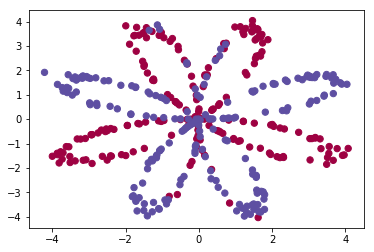

In [122]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.datasets

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

# Load the data
X, Y = load_planar_dataset();

# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

## 3.1 Two-layer neural network with 1-hidden layer of size = 1.

Reimplement the network from Section 2.1 here, train it and then display the results. 

epoch[0] = 0.09728146
epoch[10] = 0.09935662
epoch[20] = 0.09936244
epoch[30] = 0.09934754
epoch[40] = 0.09926602
epoch[50] = 0.09892327
epoch[60] = 0.09817315
epoch[70] = 0.09724175
epoch[80] = 0.09589014
epoch[90] = 0.09443383
epoch[100] = 0.09332809
epoch[110] = 0.09259587
epoch[120] = 0.09211205
epoch[130] = 0.09177365
epoch[140] = 0.09152052
epoch[150] = 0.09132029
epoch[160] = 0.09115538
epoch[170] = 0.09101571
epoch[180] = 0.09089506
epoch[190] = 0.09078929
epoch[200] = 0.09069550
epoch[210] = 0.09061153
epoch[220] = 0.09053575
epoch[230] = 0.09046687
epoch[240] = 0.09040387
epoch[250] = 0.09034592
epoch[260] = 0.09029236
epoch[270] = 0.09024262
epoch[280] = 0.09019624
epoch[290] = 0.09015284


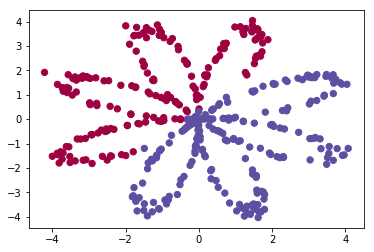

In [119]:

hidden_state_size = 1; 

X=X.T
Y=Y.T
# Define the 2-layer network here 
model = {}
model['linear1'] = nn_Linear(2, hidden_state_size)
model['sigmoid'] = nn_Sigmoid()
model['linear2'] = nn_Linear(hidden_state_size, 1)
model['loss'] = nn_MSECriterion()


# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.01
numberEpochs = 300

for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size): 
        xi = X[i:i + 1, :]
        yi = Y[i:i + 1, :]
        
        # Forward pass 
        a0 = model['linear1'].forward(xi)
        a1 = model['sigmoid'].forward(a0)
        a00 = model['linear2'].forward(a1)
        a11 = model['sigmoid'].forward(a00)
        loss += model['loss'].forward(a11, yi)
       
        # Backward pass 
        da11 = model['loss'].backward(a11, yi)
        da00 = model['sigmoid'].backward(a00, da11)
        da1 = model['linear2'].backward(a1, da00)
        da0 = model['sigmoid'].backward(a0, da1)
        model['linear1'].backward(xi, da0)
        
        # Update gradients 
        model['linear2'].weight = model['linear2'].weight - learningRate * model['linear2'].gradWeight
        model['linear2'].bias = model['linear2'].bias - learningRate * model['linear2'].gradBias

        model['linear1'].weight = model['linear1'].weight - learningRate * model['linear1'].gradWeight
        model['linear1'].bias = model['linear1'].bias - learningRate * model['linear1'].gradBias

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))


%matplotlib inline

classEstimate = np.zeros((400,1), dtype='uint8')

for i in range(0, 400):        
    # Forward pass (fill in your code)
    a0 = model['linear1'].forward(X[i:i + 1, :])
    a1 = model['sigmoid'].forward(a0)
    a11 = model['linear2'].forward(a1)
    y_hat = model['sigmoid'].forward(a11)  
        
    classEstimate[i,0] = (y_hat > 0.5)

    
X=X.T

plt.scatter(X[0, :], X[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

## 3.2 Two-layer neural network with 1-hidden layer of size = 5.

Redo the experiment with the hidden layer of size 5 and visualize the result. <b>Describe in a separate cell of the notebook what is different between the two runs </b>. What behaviout did network with largerr hidden state exhibit that the one with smaller one did not? Why? 

epoch[0] = 0.09246627
epoch[10] = 0.09782833
epoch[20] = 0.09772996
epoch[30] = 0.09721626
epoch[40] = 0.09595156
epoch[50] = 0.09497686
epoch[60] = 0.09457963
epoch[70] = 0.09416189
epoch[80] = 0.09323859
epoch[90] = 0.09157164
epoch[100] = 0.08959887
epoch[110] = 0.08794847
epoch[120] = 0.08679538
epoch[130] = 0.08598643
epoch[140] = 0.08527916
epoch[150] = 0.08428160
epoch[160] = 0.08199275
epoch[170] = 0.07651980
epoch[180] = 0.06910749
epoch[190] = 0.06293673
epoch[200] = 0.05847177
epoch[210] = 0.05527966
epoch[220] = 0.05294950
epoch[230] = 0.05120202
epoch[240] = 0.04985564
epoch[250] = 0.04879175
epoch[260] = 0.04793152
epoch[270] = 0.04722145
epoch[280] = 0.04662450
epoch[290] = 0.04611443


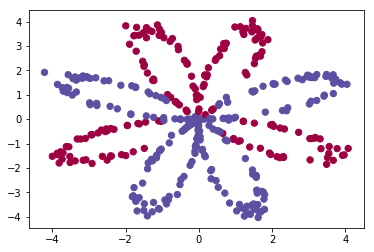

In [123]:

hidden_state_size = 5 

X=X.T
Y=Y.T
# Define the 2-layer network here 
model = {}
model['linear1'] = nn_Linear(2, hidden_state_size)
model['sigmoid'] = nn_Sigmoid()
model['linear2'] = nn_Linear(hidden_state_size, 1)
model['loss'] = nn_MSECriterion()


# Optimize the parameters of the neural network using stochastic gradient descent
# using the following parameters

learningRate = 0.01
numberEpochs = 300

for epoch in range(0, numberEpochs):
    loss = 0
    for i in range(0, Y.size): 
        xi = X[i:i + 1, :]
        yi = Y[i:i + 1, :]
        
        # Forward pass 
        a0 = model['linear1'].forward(xi)
        a1 = model['sigmoid'].forward(a0)
        a00 = model['linear2'].forward(a1)
        a11 = model['sigmoid'].forward(a00)
        loss += model['loss'].forward(a11, yi)
       
        # Backward pass 
        da11 = model['loss'].backward(a11, yi)
        da00 = model['sigmoid'].backward(a00, da11)
        da1 = model['linear2'].backward(a1, da00)
        da0 = model['sigmoid'].backward(a0, da1)
        model['linear1'].backward(xi, da0)
        
        # Update gradients 
        model['linear2'].weight = model['linear2'].weight - learningRate * model['linear2'].gradWeight
        model['linear2'].bias = model['linear2'].bias - learningRate * model['linear2'].gradBias

        model['linear1'].weight = model['linear1'].weight - learningRate * model['linear1'].gradWeight
        model['linear1'].bias = model['linear1'].bias - learningRate * model['linear1'].gradBias

    if epoch % 10 == 0: print('epoch[%d] = %.8f' % (epoch, loss / dataset_size))


%matplotlib inline

classEstimate = np.zeros((400,1), dtype='uint8')

for i in range(0, 400):        
    # Forward pass (fill in your code)
    a0 = model['linear1'].forward(X[i:i + 1, :])
    a1 = model['sigmoid'].forward(a0)
    a11 = model['linear2'].forward(a1)
    y_hat = model['sigmoid'].forward(a11)  
        
    classEstimate[i,0] = (y_hat > 0.5)

    
X=X.T

plt.scatter(X[0, :], X[1, :], c=classEstimate[:,0], s=40, cmap=plt.cm.Spectral);

<div style="font-size:0.8em;color:#888;text-align:center;padding-top:20px;">If you find any errors or have questions about the assignment please contact instructor at lsigal@cs.ubc.ca or post the question on Piazza. 